<a href="https://colab.research.google.com/github/JuanJoMontilla/Senales-y-Sistemas/blob/main/4_Transformada_Laplace/6_Red_Electrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Caracterizacion SLITs en el dominio del tiempo

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Communications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Análisis de redes eléctricas con elementos Pasivos

- Las [redes eléctricas](https://en.wikipedia.org/wiki/Electrical_network) compuestos de elementos pasivos lineales, como resistencias, condensadores e inductores, pueden describirse mediante ecuaciones diferenciales ordinarias lineales (EDO) con coeficientes constantes.

- Por lo tanto, visto desde la teoría de las señales y los sistemas, pueden interpretarse como un sistema lineal invariante en el tiempo (SLIT).

- Las diferentes formas de caracterizar las propiedades de un SLIT introducidas anteriormente se ilustran con un circuito RLC serie:

![Filtro pasa bajas analógico de segundo orden](https://github.com/amalvarezme/SenalesSistemas/blob/master/4_Transformada_Laplace/lowpass.png?raw=1)


- Se asume que no se almacena energía en el condensador ni en el inductor para $t<0$. Además, se supone que $x(t)=0$ para $t<0$.

- Por lo tanto, $y(t)=0$ y $\frac{d y(t)}{dt}=0$ para $ t<0$. Para ilustrar, se utilizan los valores de $L=0.5$, $R=1$, $C=0.4$ como los parámetros de la red eléctrica.

### Ecuación Diferencial

La ecuación diferencial que describe la relación entrada/salida en el circuito se obtiene al aplicar las [leyes de Kirchhoff](https://en.wikipedia.org/wiki/Kirchhoff's_circuit_laws). Así, se obtiene la siguiente EDO

\begin{equation}
C L \frac{d^2 y(t)}{dt^2} + C R \frac{d y(t)}{dt} + y(t) = x(t)
\end{equation}

Se define la EDO con `SymPy`

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()
#se definen variables simbólicas y EDO
t, L, R, C = sym.symbols('t L R C', real=True)
x = sym.Function('x')(t)
y = sym.Function('y')(t)

ode = sym.Eq(L*C*y.diff(t, 2) + R*C*y.diff(t) + y, x)
ode

     2                                    
    d               d                     
C⋅L⋅───(y(t)) + C⋅R⋅──(y(t)) + y(t) = x(t)
      2             dt                    
    dt                                    

Se guardan los valores de los parámetros (R, L y C) en un diccionario, para su posterior sustitución

In [2]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}
RLC

{C: 2/5, L: 1/2, R: 1}

### Respuesta al Impulso


La red eléctrica pasiva y la EDO que describen su relación de entrada/salida se pueden interpretar como un SLIT. Por lo tanto, el sistema puede caracterizarse por su respuesta al impulso $h(t)$ que se define como la salida del sistema ante una entrada impulso de Dirac $x(t) = \delta(t)$.

Para el sistema dado, la respuesta al impulso se calcula al resolver la EDO

In [3]:
solution_h = sym.dsolve(ode.subs(x, sym.DiracDelta(t)).subs(y, sym.Function('h')(t)))
solution_h

                                                                                 ⎛        ________ ↪
             ⎛        ________________⎞          ⎛       ________________⎞       ⎜       ╱   ⎛   2 ↪
             ⎜       ╱   ⎛   2      ⎞ ⎟          ⎜      ╱   ⎛   2      ⎞ ⎟       ⎜     ╲╱  C⋅⎝C⋅R  ↪
             ⎜     ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟          ⎜    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟     t⋅⎜-R + ─────────── ↪
           t⋅⎜-R + ───────────────────⎟       -t⋅⎜R + ───────────────────⎟       ⎝              C  ↪
             ⎝              C         ⎠          ⎝             C         ⎠     ─────────────────── ↪
           ────────────────────────────       ─────────────────────────────                2⋅L     ↪
                       2⋅L                                 2⋅L                ℯ                    ↪
h(t) = C₁⋅ℯ                             + C₂⋅ℯ                              + ──────────────────── ↪
                                                                                        ___

Las constantes de integración $C_1$ y $C_2$ deben determinarse a partir de las condiciones iniciales $y(t)=0$ y $\frac{d y(t)}{dt}=0$ para $t<0$.

In [4]:
integration_constants = sym.solve( (solution_h.rhs.limit(t, 0, '-'), solution_h.rhs.diff(t).limit(t, 0, '-')), ['C1', 'C2'] )
integration_constants

{C₁: 0, C₂: 0}

La sustitución de los valores de las constantes de integración $C_1$ y $C_2$ en el resultado anterior produce la respuesta al impulso:

In [5]:
h = solution_h.subs(integration_constants)
h

          ⎛        ________________⎞            ⎛       ________________⎞      
          ⎜       ╱   ⎛   2      ⎞ ⎟            ⎜      ╱   ⎛   2      ⎞ ⎟      
          ⎜     ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟            ⎜    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠ ⎟      
        t⋅⎜-R + ───────────────────⎟         -t⋅⎜R + ───────────────────⎟      
          ⎝              C         ⎠            ⎝             C         ⎠      
        ────────────────────────────         ─────────────────────────────     
                    2⋅L                                   2⋅L                  
       ℯ                            ⋅θ(t)   ℯ                             ⋅θ(t)
h(t) = ────────────────────────────────── - ───────────────────────────────────
                 ________________                      ________________        
                ╱   ⎛   2      ⎞                      ╱   ⎛   2      ⎞         
              ╲╱  C⋅⎝C⋅R  - 4⋅L⎠                    ╲╱  C⋅⎝C⋅R  - 4⋅L⎠         

Se grafica la respuesta al impulso para los valores $R$, $L$ y $C$ definidos anteriormente en el diccionario

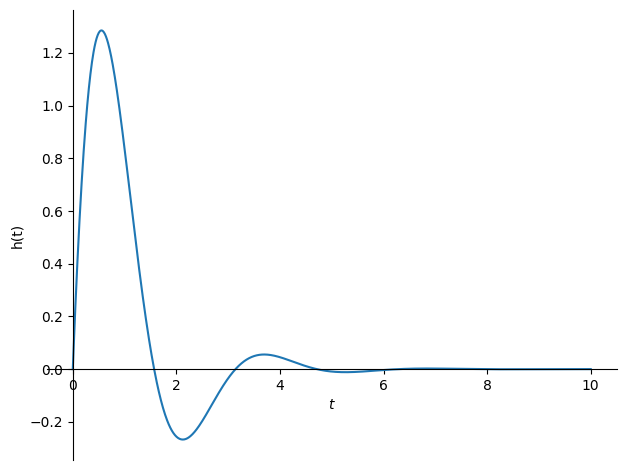

In [6]:
sym.plot(h.rhs.subs(RLC), (t,0,10), ylabel=r'h(t)');

### Respuesta al Escalón

La respuesta al escalón se obtiene al integrar la respuesta al impulso $h(t)$. Para facilitar la ilustración, esto se realiza con los valores de los parámetros definidos anteriormente.

In [7]:
tau = sym.symbols('tau', real=True)

he = sym.integrate(h.rhs.subs(RLC).subs(t,tau), (tau,0,t))
he

      ⎛             t⋅(-1 + 2⋅ⅈ)            ⎞                                                      
      ⎜  ⅈ⋅(2 - ⅈ)⋅ℯ               ⅈ⋅(2 - ⅈ)⎟            ⎛1   2⋅ⅈ   ⎛  1   2⋅ⅈ⎞  -t⋅(1 + 2⋅ⅈ)⎞     
  5⋅ⅈ⋅⎜- ─────────────────────── + ─────────⎟⋅θ(t)   5⋅ⅈ⋅⎜─ - ─── + ⎜- ─ + ───⎟⋅ℯ            ⎟⋅θ(t)
      ⎝             5                  5    ⎠            ⎝5    5    ⎝  5    5 ⎠              ⎠     
- ──────────────────────────────────────────────── + ──────────────────────────────────────────────
                         4                                                 4                       

Ahora, se grafica la respuesta al escalón

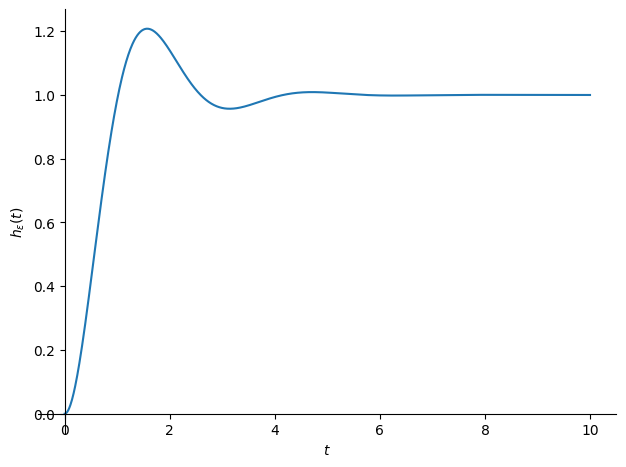

In [8]:
sym.plot(he, (t,0,10), ylabel=r'$h_\epsilon(t)$');

### Función de Transferencia

Para una señal de entrada exponencial $x(t)=e^{st}$, la función de transferencia $H(s)$ representa el peso de la señal exponencial de salida $y(t)=H(s)\cdot e^{st}$.

La función de transferencia se obtiene introduciendo $x(t)$ y $y(t)$ en la EDO y resolviendo para $H(s)$:

In [9]:
s = sym.symbols('s')
H = sym.Function('H')(s)

H, = sym.solve(ode.subs(x, sym.exp(s*t)).subs(y, H*sym.exp(s*t)).doit(), H)
H

        1         
──────────────────
     2            
C⋅L⋅s  + C⋅R⋅s + 1

Las características de transferencia de un SLIT para señales exponenciales armónicas $e^{j \omega t}=\cos(\omega t) + j\sin (\omega t)$ son de especial interés en el análisis de circuitos eléctricos.

Se puede obtener de $H(s)$ sustituyendo la frecuencia compleja $s$ por $s=j\omega$.

La función de transferencia resultante $H(j\omega)$ proporciona la atenuación y la fase que el sistema agrega a una señal de entrada armónica (comunmente conocido como [diagrama de Bode](https://en.wikipedia.org/wiki/Bode_plot)).

In [10]:
#se sustituye s por jm
w = sym.symbols('omega', real=True)

Hjw = H.subs(s, sym.I * w)
Hjw

          1           
──────────────────────
       2              
- C⋅L⋅ω  + ⅈ⋅C⋅R⋅ω + 1

Se grafica la magnitud de la función de transferencia $|H(j \omega)|$ para los valores de $R$, $L$ y $C$ definidos anteriormente en el diccionario.

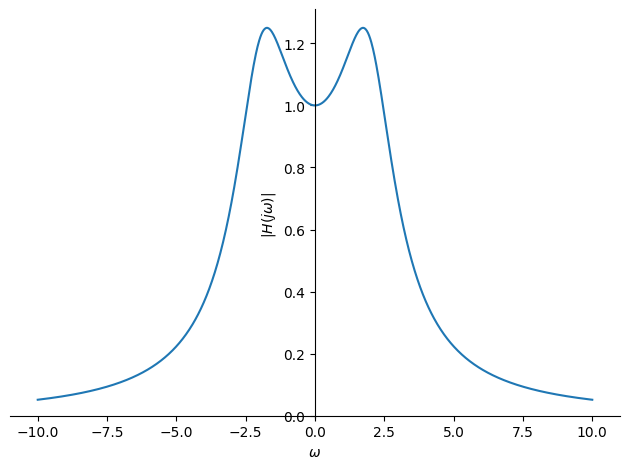

In [11]:
sym.plot(abs(Hjw.subs(RLC)), (w, -10, 10), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

Ahora, resulta obvio que las frecuencias bajas pasan a través del sistema y que las frecuencias altas se atenúan. Esto motiva el término 'pasa bajas' para tales sistemas.

Como alternativa a la solución de la EDO, la función de transferencia $H(s)$ se calcula a partir de la respuesta de impulso y se grafica para los valores especificados anteriormente de los parámetros.

In [12]:
H2 = sym.integrate(h.rhs.subs(RLC)*sym.exp(-s*t), (t,0,sym.oo), conds='none')
H2.simplify()

     5      
────────────
 2          
s  + 2⋅s + 5

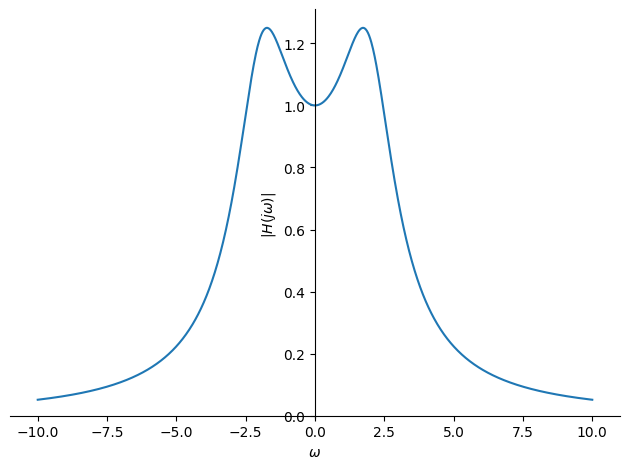

In [13]:
sym.plot(abs(H2.subs(s, sym.I*w)), (w, -10, 10), ylabel=r'$|H(j \omega)|$', xlabel=r'$\omega$');

La fase de la función de transferencia $\varphi (j\omega)=\arg \{H(j\omega)\}$ proporciona información sobre la fase agregada a una señal armónica cuando pasa a través del sistema. Se calcula y grafica para los valores específicos de los elementos dados anteriormente.

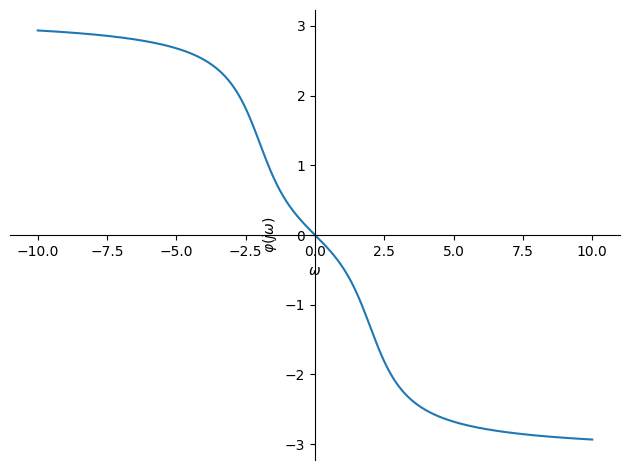

In [14]:
phi = sym.arg(Hjw)
sym.plot(phi.subs(RLC), (w, -10, 10), ylabel=r'$\varphi(j \omega)$', xlabel=r'$\omega$');

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.